<a href="https://colab.research.google.com/github/jtlee-97/Machine-Learning-with-Python/blob/main/%5B03%5DVarious_machine_learning_algorithms_using_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIST**


1.   사이킷런에서의 Perceptron (OVR)
2.   로지스틱 회귀 알고리즘
3.   서포트 벡터 머신 알고리즘
4.   결정 트리 학습
5.   k-최근접 알고리즘


### Preparation


In [ ]:
from IPython.display import Image

In [ ]:
# 붓꽃 데이터 준비
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]] # 특성 = 3번째 : '꽃잎길이' / 4번째 : '꽃잎너비'
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 
# 30% (test) : 70% (train)
# test 샘플 : 45 개
# train 샘플 : 105 개

In [ ]:
# 최상의 성능을 위한 특성 스케일 조정 (사이킷런의 preprocessing모듈의 StandardScaler클래스 사용 / 경사하강법 참고)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### StandardScaler (특성 스케일 조정)
- preprocessing 모듈에서 StandardScaler 클래스를 로드하고 새로운 StandardScaler 객체를 sc 변수에 할당한다.

- StandardScaler의 fit 메서드는 훈련 데이터셋의 각 특성마다 평균 및 표준편차를 계산한다.

- transform 메서드를 호출하면 계산된 $\sigma$*(샘플 평균)*와 $\mu$*(표준 편차)*를 사용하여 훈련 데이터 셋을 표준화한다.


---
## **[1] Perceptron with Sklearn**

**OvR** (One-versus-Rest) 방식
- 이진 분류를 실행하되 분류의미를 [ A클래스에 속하는가? / 나머지 클래스에 속하는가? ]로 분류하는 것
- N개 분류에선 N개의 분류함수가 필요함


In [ ]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [ ]:
y_pred = ppn.predict(X_test_std) # predict()을 통해 y 예측값 생성
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


> *test 샘플 45개 중 1개의 잘못 분류된 샘플이 존재*

In [ ]:
from sklearn.metrics import accuracy_score

print('정확도: %.3f' % accuracy_score(y_test, y_pred))
print('정확도: %.3f' % ppn.score(X_test_std, y_test))

정확도: 0.978
정확도: 0.978


> 사이킷런의 분류기는 분류 예측 정확도를 계산하는 "score 매서드"가 존재한다

### **붓꽃 샘플을 통한 결과 시각화**

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

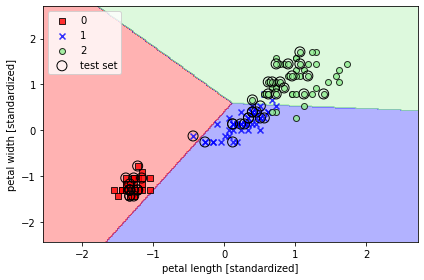

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

      결과 그래프를 보면 세 개의 붓꽃 클래스는 선형 결정 경계로 완벽히 분류되지 않았다.
      퍼셉트론 알고리즘은 선형적으로 구분되지 않는 데이터 셋에 수렴하지 못한다.
      에포크마다 적어도 하나의 샘플이 잘못 분류되기 떄문에 가중치 업데이트가 끝도없이 계속된다.
      그래서 실전에서는 퍼셉트론 알고리즘을 추천하지 않는다.
      
      그래서 다음 [2]번에서 클래스가 선형적으로 완벽히 구분되지 않아도 최솟값에 수렴하는 좀 더 강력한 선형 분류 모델을 만들어보자

---
## **[2] Logistic Regression**

      로지스틱 회귀 : 구현이 쉽고 선형적 구분되는 클래스에 뛰어난 성능을 보이는 분류모델, 이진분류를 위한 선형 모델 (회귀모델 X) 

      얼마나 강하게 확신을 하면서 예측을 했는가?

#### **Odds ratio (오즈비)** 
      : 특정 이벤트가 발생할 확률

> 로짓함수 : 
$logit(P) = log\frac{P}{(1-P)}$  

      [ P = 양성 샘플(예측하려는 대상)일 확률]
      
      양쪽에 자연로그를 적용

      0 <= P <= 1이면, 오즈비가 0부터 무한의 사이 값이 되어 P가 1에 가까우면 분모가 0이되어 무한대로 큰 값이 된다.

      근데 로짓함수로 바꿔 로그로 취해진다면, 범위가 -무한에서 +무한으로 된다.

> $logit(P(y=1|x)) = w_{0}x_{0}+w_{1}x_{1}+...+w_{n}x_{n} = \sum_{i=0}^{m}w_{i}x_{i} = w^{T}x$

      [P(y=1|x)는 특성 x가 주어졌을 때 이 샘플이 클래스 1에 속할 조건부 확률]

#### 로지스틱 시그모이드 함수 (logistic sigmoid funtion)
> 양성 샘플일 확률 

> $\phi(z) = \frac{1}{1+e^{-z}} = \frac{e^{z}}{e^{z}+1}$

> $[z=w^{T}x]$

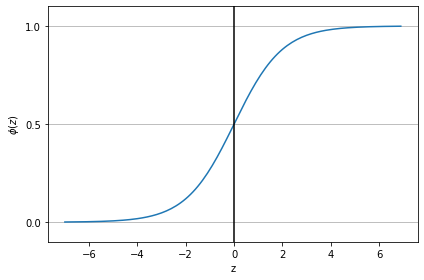

In [ ]:
# 시그모이드 함수를 -7 ~ +7까지 그려서 확인
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

### **아달린과 로지스틱 회귀의 차이점**

In [ ]:
Image(url='https://git.io/Jtm22', width=500) 

      아달린의 활성화 함수에 시그모이드 함수를 넣게되면 로지스틱 회귀가 된다
> 예측확률 (시그모이드 값 기준) - [predict_proba 함수]

$\hat{y} = \left\{\begin{matrix}
1 \to \phi (z) \geq 0.5  \\ 0 \to other
\end{matrix}\right.$

> 시그모이드 값을 보지 않고 z값으로만도 단순히 예측이 가능하다. - [predict 함수]

$\hat{y} = \left\{\begin{matrix}
1 \to z\geq 0  \\ 0 \to other
\end{matrix}\right.$



**로지스틱 비용함수의 가중치 학습**

> **가능도** : $L(w) = \prod_{i=1}^{n}\phi (z^{(i)})^{y^{i}}(1-\phi(z^{(i)})^{1-y^{(i)}}$
---
> **로그 가능도** : $logL(w) = \sum_{i=1}^{n}[y^{i}log\phi(z^{(i)})+(1-y^{(i)})log(1-\phi(z^{(i)}))]$


$\prod$ : 곱함수

      가능도 함수 식을 보면,
      양성 샘플인 경우 1-y^(i)가 0이 되어 두번째 항이 1이 되고, 양성샘플일 확률인 phi(z)만 남는다.
      음성 샘플인 경우 y^(i)가 0이 되어 첫째 항이 1이 되고, 음성샘플일 확률인 1- phi(z)만 남는다.
      즉, 가능도가 최대가 되려면 양성 샘플의 phi(z)가 가능한 크고 음성샘플의 phi(z)는 가능한 작아야 한다는 것이다.


      가능도 함수가 최대가 되는 것이 좋은 모델이 될텐데, 이 가능도 함수를 그대로 사용하는 것보다 로그를 씌워서 사용하면 수학적으로 쉬워진다.

      로그를 씌우게되면 로그 가능도 함수처럼 만들 수 있다. 그래서 역시 로그 가능도 함수가 커질수록 좋다.

      로그 함수를 적용하면 가능도가 매우 작을 때 일어나는 수치상 언더플로를 미연에 방지할 수 있으며, 계수의 곱을 계수의 합으로 바꿀 수 있다.

      이 로그 함수를 또 다시 비용함수로 표현하여 경사 하강법을 사용해 최소화 할 수 있다.


> **로지스틱 비용함수** : $J(w) = -\sum_{i=1}^{n}[y^{i}log\phi(z^{(i)})+(1-y^{(i)})log(1-\phi(z^{(i)}))]$
---
> **손실계산** : $J(w) = \left\{\begin{matrix}
-log(\phi(z)) \to y=1 \\ -log(1-\phi(z)) \to y=0 
\end{matrix}\right.$

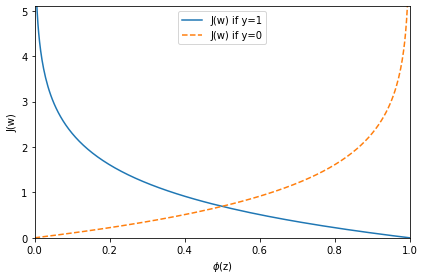

In [ ]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/03_04.png', dpi=300)
plt.show()

      그림으로 그려본 결과 y=1인 양성샘플인 경우는 sigmoid 함수가 1에 가까워야 손실이 최소가 되는 것을 볼 수 있으며, 
      반대로 y=0인 음성샘플인 경우는 sigmoid 함수가 0에 가까워야 손실이 최소가 되는 것을 볼 수 있다.

      잘못된 예측에 대해서는 점점 더 큰 비용을 무한으로 부여한다는 점이 중요하다.

      이제 로지스틱 회귀 알고리즘을 파이썬 코드로 적용해 볼 것이다.
      아달린 알고리즘에서 비용 함수 J를 새로운 비용함수로 바꿔주기만 하면 된다.

      아달린 코드와 확인해보면 활성화 함수와 비용함수만 다른 것을 확인할 수 있다.

      ( 로지스틱 회귀를 위한 경사 하강법 알고리즘 유도 공식 : p.103 )

In [ ]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)

            # 가중치 변화량
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # 비용함수 = 로지스틱 회귀 비용함수 적용
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)

        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        # 로지스틱 시그모이드 활성화 계산
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

      *코드 부가 설명*
      활성화 함수의 시그모이드 함수 중
      numpy.exp : 지수함수
      numpy.clip : 클립핑 : 값을 제한함.

      값을 제한하는 이유는 넘파이 지수함수가 아주 큰값과 작은 값에 민감하기 때문에 z값을 제한시켜 -250/250을 넘어가지 않게 한 것

      이 대신에 from scipy.special import expit의 expit(z)를 이용하면 z값에 관계없이 안정적으로 사용할 수 있다.

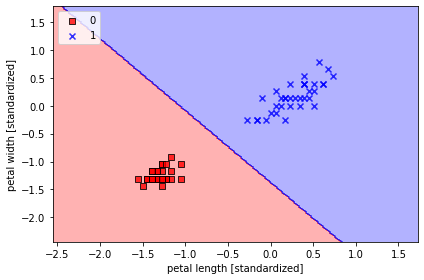

In [ ]:
# 그래프를 그려서 확인
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)] # 다중분류가 아닌 이진분류를 통해 확인할 수 있기에 0과 1만 뽑아서 확인한다
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### **사이킷런의 로지스틱 회귀 모델 훈련**

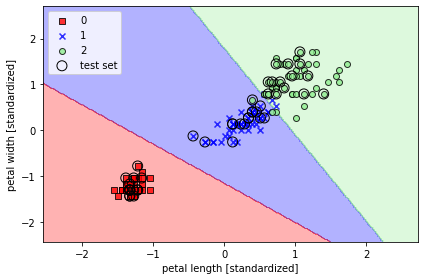

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### *Predict_proba 함수 이용해보기 (확률값 확인가능)*

In [ ]:
# 처음 세 개의 샘플만 확률값을 출력해봄
lr.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

      1번 샘플은 2번째 클래스에 가장 큰 확률을 보인다.
      2번 샘플은 0번째 클래스에 가장 큰 확률을 보인다.
      3번 샘플은 0번째 클래스에 가장 큰 확률을 보인다.

In [ ]:
# 당연히 각 행을 모두 더하면 1이 된다. (하나의 샘플에 대한 각 클래스 확률을 더한 것이기 때문)
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [ ]:
# 행 중에 가장 큰 값의 열 index를 출력할 수 있다.
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

#### *Predict 함수 이용해보기 (단순히 결과만 확인)*

In [ ]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [ ]:
# 샘플 하나만 예측할 때는 주의해야함!
# 사이킷런은 입력 데이터로 2차원 배열을 기대하기 때문에 하나의 행만을 확인하려면 꼭 reshape 메서드를 통해 새로운 차원을 추가해줘야 한다
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

### **규제(Regularization)을 사용해 과대적합(Overfitting) 피하기**

      - 과대적합 : 분산이 큼 : 모델 파라미터가 너무 많아 주어진 데이터에서 너무 복잡한 모델을 만듬
      - 과소적합 : 편향이 큼 : 훈련 데이터에 있는 패턴을 감지할 정도로 충분히 모델이 복잡하지 않음 : 성능이 낮음


      분산 : 모델을 여러번 훈련했을 때, 특정 샘플에 대한 예측의 일관성/변동성을 측정 (무작위성)
      편향 : 다른 훈련 데이터셋에서 여러번 훈련했을 때 예측이 정확한 값에서 얼마나 벗어났는지 측정 (구조적 에러)

In [ ]:
Image(url='https://git.io/Jtm2V', width=700) 

      규제의 정도에 따라서 과소적합이 될 수도 있으며, 과대적합이 될 수도 있다.

      규제(Regularization)는 데이터의 잡음을 제거하여 과대적합을 방지할 수 있는 유용한 방법이다.



#### **L2 규제**

      가장 널리 사용하는 규제 형태로 'L2축소' 또는 '가중치 감쇠'라고 부른다.

L2 규제 (L2노름$^{2}$) : $\left\|w \right\|_{2}^{2} = \sum_{j=1}^{m}w_{j}^{2}$

L1 규제 (L1노름) : $\left\|w \right\|_{1}^{} = \sum_{j=1}^{m}\left| w_{j}\right|$

---
**규제가 추가된 비용함수** : $J(w) = -\sum_{i=1}^{n}\begin{bmatrix}
y^{(i)}log\phi(z^{(i)})) + (1-y^{(i)})log(1-\phi(z^{(i)})) \end{bmatrix} + \frac{\lambda }{2}\sum_{j=1}^{m}w_{j}^{2}$ 

      끝에 필요한 규제의 항을 추가하게 된다.

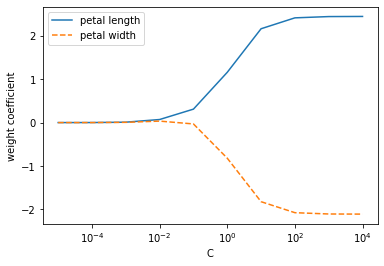

In [ ]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

        *코드 추가 설명*
        LogisticRegression의 매개변수 중
        - C : λ의 역수 : 증가시키면 규제가 작아지고, 감소시키면 규제가 커짐 : 기본값 1.0
        - penalty : L2와 L1 규제를 지정 : l2 / l1 : 기본값은 l2로 현재 코드에서 지정은 되어있지 않음


        *그래프 추가 설명*
        C의 값이 작아지면 모델의 규제가 커지기 때문에 가중치값이 매우 작아짐
        C의 값이 커지면 모델의 규제가 작아지기 때문에 가중치값이 매우 커짐

---
## **[3] SVM (Support Vector Machine)**
      서포트 벡터 머신은 강력하고 널리 사용되는 학습 알고리즘이다.
      
      결정 경계, 즉 분류를 위한 기준 선을 정의하는 모델이며 최적의 결정 경계를 그려야 한다.
      
      [Margin : 마진]
      퍼셉트론 알고리즘의 확장으로 볼 수 있으며, SVM의 최적화 대상은 마진을 최대화하는 것이다.

      마진 : 클래스를 구분하는 초평면과 이 초평면에 가장 가까운 훈련 샘플 사이의 거리로 정의
      훈련 샘플을 "서포트 벡터"라고 한다.


      [Hyperplane : 초평면]
      속성이 2개라면 : 2차원 그래프로 결정경계가 "선" 으로 그려진다.
      속성이 3개라면 : 3차원 그래프로 결정경계가 "평면"이 된다.
      속성의 개수가 더 늘어나면 더욱 복잡해지며 시각적으로 보기 힘들어질 것이다.

      그렇다면 결정 경계도 고차원이 될 텐데, 이를 "Hyperplane" 즉, "초평면"이라고 부른다.





In [ ]:
Image(url='https://hleecaster.com/wp-content/uploads/2020/01/svm02-1536x1278.png', width=400) 
# 속성 3개에서의 초평면 그림

In [ ]:
Image(url='https://git.io/Jtm2r', width=600) 

In [ ]:
Image(url='https://hleecaster.com/wp-content/uploads/2020/01/svm03.png', width=400)

      해당 그래프를 볼때 가장 결정 경계가 적절한 모델을 찾는다면 Graph F이다.
      이유는 두 클래스(분류) 사이에서 거리가 가장 멀기 때문이다.

      이것이 중요하다! ⚡"두 클래스 사이에서 거리가 가장 먼 결정 경계"⚡

    
      "서포트 벡터"는 결정 경계와 가까이 있는 데이터 포인트들을 의미하고,
      "마진"은 결정 경계와 서포트 벡터 사이의 거리를 의미한다.


In [ ]:
Image(url='https://hleecaster.com/wp-content/uploads/2020/01/svm04.png', width=400)

      가운데 실선은 "결정 경계"이며, 그로부터 검은 테두리가 빨간점 1개, 파란점 2개를 두고 점선이 그려졌다. (각 점이 서포트 벡터)
      여기서 점선으로부터 결정경계 사이의 거리가 "마진"이다.
      
      SVM은 결정 경계를 정의하는 것이 결국 서포트 벡터이기 떄문에 수 많은 데이터 포인트를 무시하고,
      필요한 서포트 벡터만 잘 골라내면 되기에 속도가 매우 빠르다는 장점이 있다.



### **[3-1] 최대 마진**

      "큰 마진의 결정 경계"를 원하는 이유는 일반화 오차가 낮아지는 경향이 있기 때문이다. (작은 마진의 모델은 과대적합되기 쉽다)
      
      이해를 위해 양성 샘플의 초평면과 음성 샘플의 초평면을 통해 알아보자


> 양성 샘플 쪽의 초평면 [A] : $w_{0} + w^{T}x_{pos} = 1
$

> 음성 샘플 쪽의 초평면 [B] : $w_{0} + w^{T}x_{neg} = -1$

      두 선형식 A와 B를 빼면 

> $w^{T}(x_{pos}-x_{neg}) = 2$

      벡터 w의 길이로 정규화 작업 진행하면

> $\left\|w\right\| = \sqrt{\sum_{j=1}^{m}w_{j}^{2}}$

      결과식을 정리하면 최종적으로

> $\frac{w^{T}(x_{pos}-x_{neg})}{\left\|w\right\|} = \frac{2}{\left\|w\right\|}$

      이 식의 좌변은 양성 쪽 초평면과 음성 쪽 초평면 사이의 거리로 해석할 수 있다. 이것이 최대화하려는 마진(Margin)이다.

✒
### **즉, SVM의 목적함수는 샘플이 정확히 분류된다는 조건하에 $\frac{2}{\left\|w\right\|}$을 최대화함으로써 마진을 최대화하는 것이다**

> 참고 : 실제로는 동일한 효과를 내면서 콰드라틱 프로그래밍 방법으로 풀수있는 $\frac{\left\|w\right\|^{2}}{2}$을 최소화하는 것이 더 쉽다. (해당 설명은 관련 논문 참고)

### **[3-2] 슬랙 변수를 사용해서 비선형 분류 문제 처리 (소프트마진)**

        1995년 블라드미르 바프닉이 소개한 슬랙 변수 "ξ(제타)"를 이용,
        슬랙 변수를 추가하여 마진을 넓히고, 마진 사이의 sample 일부를 허용시킨다. (소프트마진의 방법)
        
        ✅ 슬랙변수 : 선형적으로 구분되지 않는 데이터에서 선형 제약 조건을 완화하기 위해 도입
                     : 잘못 분류된 데이터로부터 해당 클래스의 결정 경계까지의 거리

        ⚡ 즉, 적절하게 손해를 보면서 분류 오차가 있는 상황에서 최적화 알고리즘에 수령시킴 

양성 샘플일 때 : $w_0+\boldsymbol w^T \boldsymbol x^{(i)} \ge 1-\zeta^{(i)}$

음성 샘플일 때 : $w_0+\boldsymbol w^T \boldsymbol x^{(i)} \le -1+\zeta^{(i)}$

목적 함수 : $\dfrac{1}{2} \boldsymbol w^T \boldsymbol w+C\sum_i \zeta^{(i)}$


        소프트마진은 하드마진 목적함수에 제타변수의 합이 추가되어 작성되며, 
        제타를 최소화하는 것과 가중치를 최소화하는 것에 대한 균형을 잡기 위해 C 매개변수를 이용한다.

        ⚡ C 매개변수 : 규제의 매개변수 Lamda의 역수 (C가 커지면 규제가 약해져 복잡한 모델이 만들어짐)
                  --> Logistic Regression 참고 

In [ ]:
Image(url='https://git.io/Jtm26', width=400) 

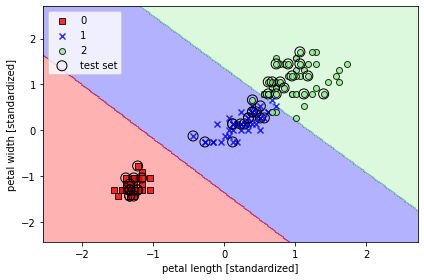

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1) # 커널 매개변수에 linear로 선형 문제를 풀도록 설정
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### **[3-3] 사이킷런의 다른 구현**

In [ ]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron') # 퍼셉트론 알고리즘을 확률적 경사하강법으로 풀 수 있음
lr = SGDClassifier(loss='log')         # 로지스틱 회귀 알고리즘을 확률적 경사하강법으로 풀 수 있음
svm = SGDClassifier(loss='hinge')      # SVM 알고리즘을 확률적 경사하강법으로 풀 수 있음

### **[3-4] 커널 SVM을 사용하여 비선형 문제 풀기**

        선형적으로 구분되지 않는 데이터를 위한 커널 방법

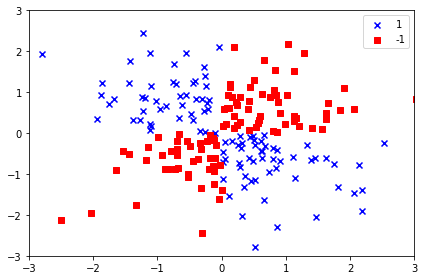

In [ ]:
# 두 개의 이진 데이터를 만드는 과정임 (XOR)

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)

y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)

y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')

plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

        둘중 하나라도 양성이면 "1" / 둘다 양성/음성이면 "-1"인 가상의 XOR 샘플 데이터 셋을 생성

        해당 데이터 셋을 보면 결정경계를 어떻게 그려도 잘 나눌 수 있는 직선을 쉽게 찾기가 어렵다.

        이를 잘 나눌 수 있는 "커널" 방법의 "커널" 함수를 이용해 나눌 것이다.


        ⚡ 커널 함수 방식 : 저차원에서는 선형적으로 구분할 수 없으나 고차원으로 확장해서 변환하면 선형적으로 찾을 수 있는 결정 경계를 찾는 방법

### $\phi(x_1, x_2)=(x_1, x_2, x_1^2+x_2^2) = (z_{1}, z_{2}, z_{3})$

❗ *($x_1^2+x_2^2$를 추가하여 3차원으로 만듬)*

In [ ]:
Image(url='https://git.io/Jtm2X', width=700) 

❌ 차원을 옮기는 개념을 이렇지만 SVC/SVR 클래스는 실제로 고차원으로 데이터를 변환하지 않고, 한 것과 같은 효과를 내는 함수를 사용한다. 

⚡ 그러한 함수를 "커널 함수"라고 한다.





✅ **사용될 커널 함수**


-   방사 기저 함수 (Radial Basis Function : RBF / 가우시안 커널)
      - 가장 널리 쓰이는 커널 함수
      - 
$K(\boldsymbol x^{(i)}, \boldsymbol x^{(j)})=\text{exp}\left(-\dfrac{1}{2\sigma^2}\lVert \boldsymbol x^{(i)}-\boldsymbol x^{(j)} \rVert^2\right)=\text{exp}\left( -\gamma\lVert \boldsymbol x^{(i)}-\boldsymbol x^{(j)} \rVert^2 \right)$

      - $\gamma$ : 감마 값이 커지면 가까운 샘플이라도 지수 값이 0에 가까워짐 (복잡해짐)


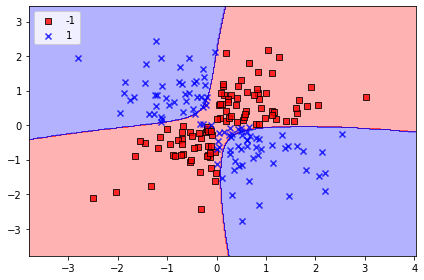

In [ ]:
# C = 10.0 | Gamma = 0.01

svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0) # C와 gamma 값을 조정하여 모델 복잡도를 조정
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

        위 그래프는 C : 10.0 | Gamma : 0.01 의 그래프에서의 결과이다.
        해당 변수들의 값을 조정해서 확인해보자

        감마 값을 크게하면 서포트 벡터의 영향이나 범위;가 줄어들게 되어 결정경계는 더욱 샘플에 가까워지고 구불구불해진다.

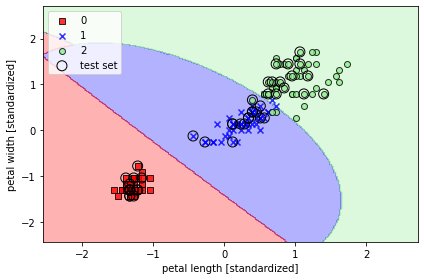

In [ ]:
# Gamma = 0.2
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=10.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

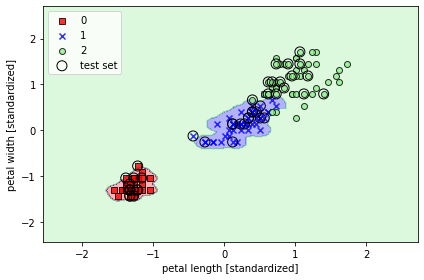

In [ ]:
# Gamma = 100.0
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=10.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

---
## **[4] 결정 트리 학습 (Decision Tree)**

        - 분류와 회귀 모두 가능한 지도학습 모델 중 하나
        - 특정 질문(기준)에 따라 데이터를 구분하는 모델
        - 순수노드까지 분할해가는 방식

In [ ]:
Image(url='https://git.io/Jtm21', width=500) 

        결정 알고리즘을 통해 Root에서 시작해 "정보 이득(Information Gain: IG)"이 최대가 되는 특성으로 데이터를 나눈다.
        리프 노드가 순수해질 때까지 모든 자식 노드에서 분할작업을 반복 수행한다.

        하지만 너무많은 반복 수행은 많은 깊은 트리로 인해 과대적합이 될 확률이 높아진다.

        그래서 일반적으로 트리의 최대 깊이를 제한하여 트리를 "가지치기(Pruning)"하여 과대적합을 방지한다.

### **[4-1] 정보 이득(IG) 최대화**

  ✅ **정보 이득의 정의**
  - $IG = I_p - \dfrac{n_{left}}{n_p}I_{left} - \dfrac{n_{right}}{n_p}I_{right}$

        I : 불순도 : 해당 범주 내 서로 다른 데이터가 얼마나 섞여있는지의 정도
        n : 전체 샘플 개수 (np : 부모 노드에 있는 전체 샘플 개수 / nj : j번째 자식 노드의 샘플 개수)

        위의 식처럼 정보 이득은 "부모 노드의 불순도와 자식 노드의 불순도 합의 차이" 이다.
        
    ⚡ 정보이득을 최대화 하는 것이 중요 ⚡

✅ **이진 결정 트리에서 널리 사용되는 세 개의 불순도 지표 / 분할 조건**


1.   **Gini impurity : 지니 불순도**
    - 클래스 개수에 따른 케이스들의 불순한 정도를 나타내는 척도

    
2.  ⚡ **Entropy : 엔트로피 : $I_{H}$**
    - 데이터 분포의 순수도를 나타내는 척도 / 불순도를 수학적으로 나타낸 척도
    - 데이터 순도 정도와 엔트로피 값은 비례
    - $Entropy(S) = \sum_{i=1}^{c}p_{i}*I(x_{i})$
        *   S : 이미 발생한 사건의 모음
        *   c : 사건의 개수
        *   $I(x) = log_{2}\frac{1}{p(x)}$
        *   $p(x)$는 사건 x가 발생할 확률




3.   **Classification Error : 분류 오차**
    - 엔트로피 / 지니계수와 더불어 불순도를 측정할 수 있긴 하지만 두 지표와 달리 미분이 불가능해 자주 쓰이지는 않음


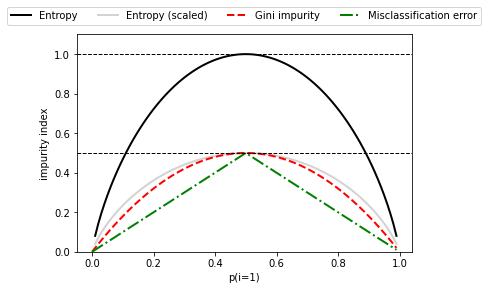

In [ ]:
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

        그래프를 보면, 엔트로피와 지니불순도 모두 매우 비슷한 결과가 나오는 것을 확인할 수 있다.
        *앤트로피 : 스케일 조정 1/2*

### **[4-2] 결정 트리 만들기**


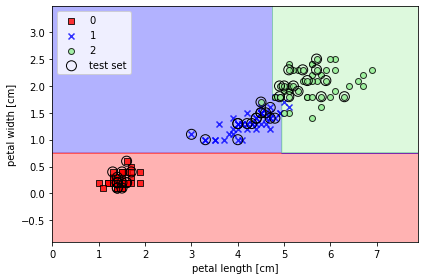

In [37]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1) # gini 불순도 사용 / 가지치기(깊이제한) 4로 설정
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

        해당 트리구현을 시각화할 수 있는 기능이 사이킷런에 있다.
        첫번째 트리는 기본적으로 시각화한 모델이며,
        두번째 트리는 GraphViz 프로그램을 이용해 더욱 보기 좋게 한 모델이다. (넘어가도 된다)

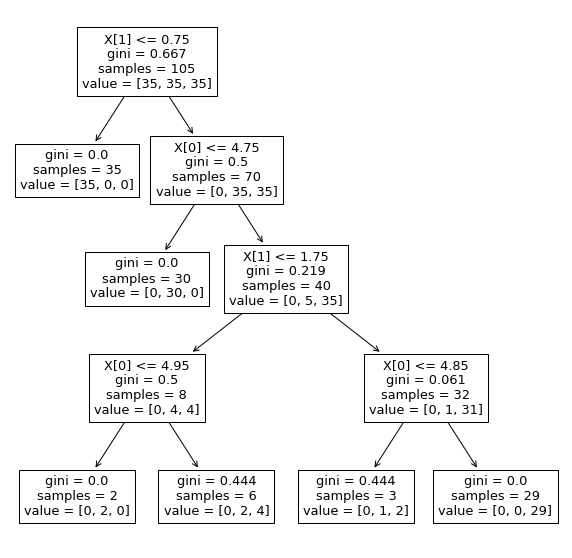

In [38]:
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(tree_model)
plt.show()

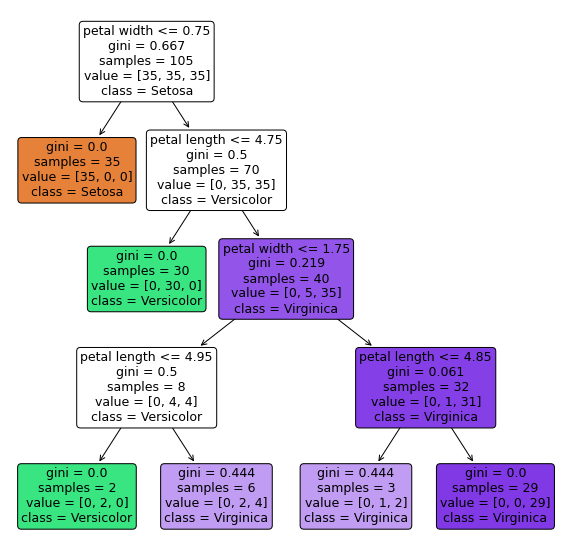

In [40]:
plt.figure(figsize=(10,10))
tree.plot_tree(tree_model,
               impurity=True,
               filled=True, 
               rounded=True,
               class_names=['Setosa', 
                            'Versicolor',
                            'Virginica'],
               feature_names=['petal length', 
                              'petal width'])
plt.show()

### **[4-3] 랜덤 포레스트**


      랜덤 포레스트 (Ramdom Forest) 알고리즘은 확장성이 좋고 사용하기 쉬운 결정 트리기반 앙상블이다.

      앙상블(Ensemble)은 여러 알고리즘을 같이 사용해 더욱 뛰어난 분류성능과 과대적합에 안정적인 방식이다. 차후 "배깅"이나 "부스팅" 등의 다양한 앙상블 방법이 있다.

      랜덤 포레스트는 결정트리의 앙상블이라고 생각할 수 있으며, 여러 깊은 결정트리를 평균내는 방식으로, 랜덤 포레스트 알고리즘의 단계는 다음과 같다.

      1.   n개의 랜덤한 부트스트랩(bootstrap) 샘플을 추출한다.
      2.   부트 스트랩 샘플에서 결정 트리를 학습한다.
            - 중복을 허용하지 않고 랜덤하게 d개의 특성을 선택
            - 정보 이득과 같은 목적함수를 기준으로 최선의 분할을 만드는 특성을 사용해 노드를 분할
      3.    1-2단계를 반복한다.
      4.    각 트리의 예측을 모아 "다수결 투표(Majority Voting)" 방식으로 클래스 레이블을 할당한다. 


    ✅ Bootstrap 샘플
     : "중복을 허용한 랜덤샘플링"으로 결정트리의 과대적합을 방지하기 위해 사용한다.
     : 부트스트랩을 이용하면 성능이 낮은 트리가 생성되는데, 이를 앙상블시켜 최종 결정성능을 높힌다.

     : 부트스트랩 방식말고 특성의 개수를 이용하는 방식도 존재한다.

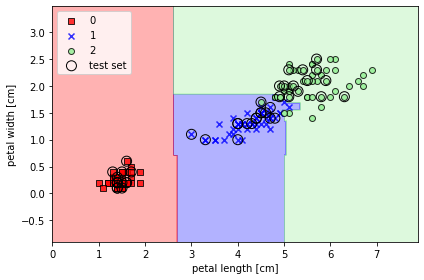

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

        n개의 샘플을 뽑는 개수를 지정하고 싶다면 RandomForestClassifier에서 max_samples 변수에 지정가능하다.

        - n_estimators 변수는 만들 샘플의 개수를 의미, 총 25개의 결정트리를 사용했다는 것을 의미한다.
        - n_jobs는 컴퓨터의 멀티 코어를 사용해 모델 훈련을 병렬화하는데, 현재 2개의 코어를 사용했다.
        - max_depth(가지치기)가 사용하지 않은 것을 볼 수 있다.

---
## **[5] k-최근접 이웃 알고리즘 (K-Nearest Neighbor, KNN)**


      k-최근접 이웃 알고리즘 (K-Nearest Neighbor, KNN)은 게으른 학습 알고리즘이라고도 한다.
      머신러닝에서 기초적으로 소개하는 알고리즘이며, 방식이 정말 단순한 알고리즘이다.

      k-최근접 이웃 알고리즘은 학습의 개념과는 거리가 멀다.

      기본적 방식은 새로운 샘플과 가까운 이웃 샘플을 확인하여, 해당 샘플의 클래스나 값을 예측하는 방식이다.

      단계는 다음과 같다.
      1.   숫자 k와 거리 측정 기준을 선택
      2.   분류하려는 샘플에서 k개의 최근접 이웃을 찾는다
      3.   다수결 투표를 통해 클래스 레이블을 할당(예측)한다.

In [43]:
Image(url='https://git.io/Jtm25', width=400) 

        코드를 실행해 확인해보자

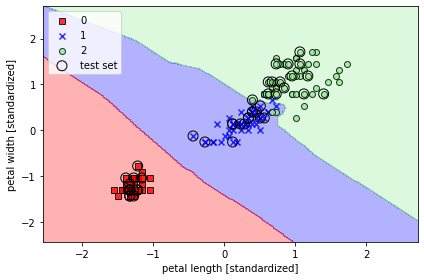

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_24.png', dpi=300)
plt.show()

      확인해보면 선택한 거리측정 기준에 따라서 KNN알고리즘이 훈련 데이터셋에서 분류하려는 포인트와 가장 가까운(비슷한) 샘플 k개를 찾은 것을 볼 수 있다.

      KNeighborsClassifier 클래스의 매개변수를 확인해보자.
      - n_neighbors : 이웃한 샘플 측정 개수, 즉 가까운 샘플 몇개를 확인할 것인가에 대한 기준이다.
                    : n_neighbors 변수의 값이 크면 안정적 모델이 될 가능성이 높고, 낮으면 과대적합될 가능성이 높다.

      - metric : 샘플간 거리 계산 방식을 지정한다.
               : 방식으로는 "minkowski" / "manhattan" 두가지 있는데,
                 minkowski는 뉴클리드 거리측정 방식으로 피타고라스에 기반해 두점 사이의 거리측정 방식이며, p=2로 표기한다.
                 manhattan은 맨허튼거리 방식을 의미하며, p=1으로 표기한다.

               : 그외에도 사이킷런에는 여러가지 거리 측정 기준이 있으며, 참고하면 된다.
               : "http://scikit-learn.org/stable.modules/generated/sklearn.neighbors.DistanceMetric.html" 